# Insect Image Processing for Background Replacement

In this notebook, we aim to create a proof of concept for replacing the flower screen background in images captured by DIOPSIS insect cameras with a plain yellow background. This will be achieved through a series of image processing steps.

## Step 1: Imports

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Step 2: Image Loading

We will define a function to load images and convert them to the HSV color space, which is more suitable for color segmentation.

In [21]:
def load_and_convert_image(image_path):
    image = cv2.imread(image_path)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return image, image_hsv

## Step 3: Color Segmentation

To separate the flowers from the insects, we will create a color mask that targets the range of colors present in the flower screen.

In [22]:
def create_mask(image_hsv):
    # Assuming insects are not green, yellow, or blue.
    # These ranges should be adjusted based on the actual colors of the insects.
    lower_green = np.array([36, 0, 0])
    upper_green = np.array([86, 255, 255])
    lower_yellow = np.array([14, 110, 110])
    upper_yellow = np.array([26, 255, 255])
    lower_blue = np.array([94, 80, 2])
    upper_blue = np.array([126, 255, 255])
    
    # Create masks for the different colors
    mask_green = cv2.inRange(image_hsv, lower_green, upper_green)
    mask_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)
    mask_blue = cv2.inRange(image_hsv, lower_blue, upper_blue)
    
    # Combine masks
    mask = cv2.bitwise_or(mask_green, mask_yellow)
    mask = cv2.bitwise_or(mask, mask_blue)
    
    return mask

def create_flower_mask(image_hsv, lower_yellow, upper_yellow, lower_blue, upper_blue):
    # Create masks for each color and combine
    mask_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)
    mask_blue = cv2.inRange(image_hsv, lower_blue, upper_blue)
    mask = cv2.bitwise_or(mask_yellow, mask_blue)
    return mask
    
    # Define color range for yellow and blue flowers
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    lower_blue = np.array([60, 100, 100])
    upper_blue = np.array([120, 255, 255])

## Step 4: Background Replacement

With the mask created, we can now proceed to replace the flower screen areas with a uniform yellow color.

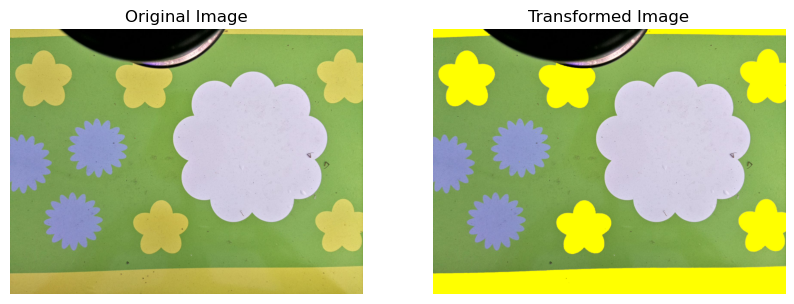

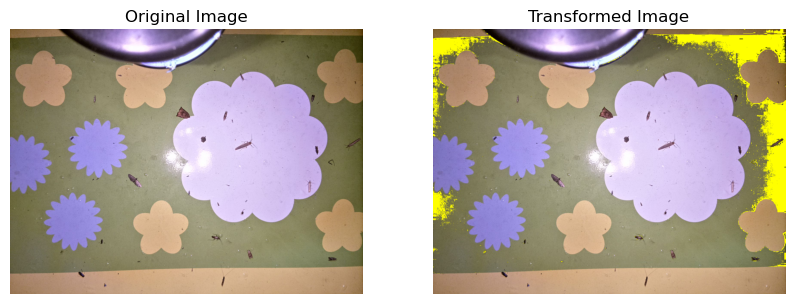

In [27]:
def replace_background(image, mask):
    yellow = np.array([0, 255, 255], dtype=np.uint8)  # yellow
    
    inverse_mask = cv2.bitwise_not(mask)
    
    yellow_background = np.full_like(image, yellow)
    
    background = cv2.bitwise_and(yellow_background, yellow_background, mask=mask)
    foreground = cv2.bitwise_and(image, image, mask=inverse_mask)
    result = cv2.add(background, foreground)
    return result

# Function to create a mask for the flower screen for day image
def create_day_flower_mask(image_hsv):
    # Define range of colors to detect yellow flowers
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    # Define range of colors to detect blue flowers
    lower_blue = np.array([60, 100, 100])
    upper_blue = np.array([120, 255, 255])
    # Create masks for each color and combine
    mask_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)
    mask_blue = cv2.inRange(image_hsv, lower_blue, upper_blue)
    mask = cv2.bitwise_or(mask_yellow, mask_blue)
    
    return mask
# Function to create a mask for the flower screen for night image
def create_night_flower_mask(image_hsv):
    # Adjust ranges if the flowers appear darker at night
    lower_yellow_night = np.array([20, 100, 50])
    upper_yellow_night = np.array([30, 255, 200])
    
    lower_blue_night = np.array([60, 100, 50])
    upper_blue_night = np.array([120, 255, 200])
    
    # Create masks for each color and combine
    mask_yellow_night = cv2.inRange(image_hsv, lower_yellow_night, upper_yellow_night)
    mask_blue_night = cv2.inRange(image_hsv, lower_blue_night, upper_blue_night)
    mask_night = cv2.bitwise_or(mask_yellow_night, mask_blue_night)
    
    return mask_night

def plot_images(original, transformed):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Transformed Image')
    plt.imshow(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Sample usage for day image
image_day, image_hsv_day = load_and_convert_image('data/flower-day.jpg')
mask_day = create_day_flower_mask(image_hsv_day)
result_day = replace_background(image_day, mask_day)

# Sample usage for night image
image_night, image_hsv_night = load_and_convert_image('data/flower-night.jpg')
mask_night = create_night_flower_mask(image_hsv_night)
result_night = replace_background(image_night, mask_night)

# Display the result
plot_images(image_day, result_day)
plot_images(image_night, result_night)


## Step 4.1: Background Replacement - Another Approach

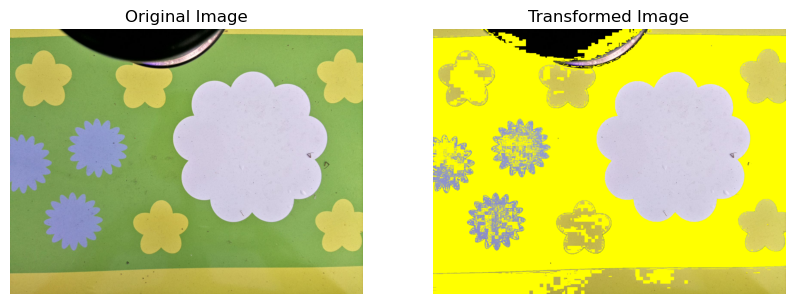

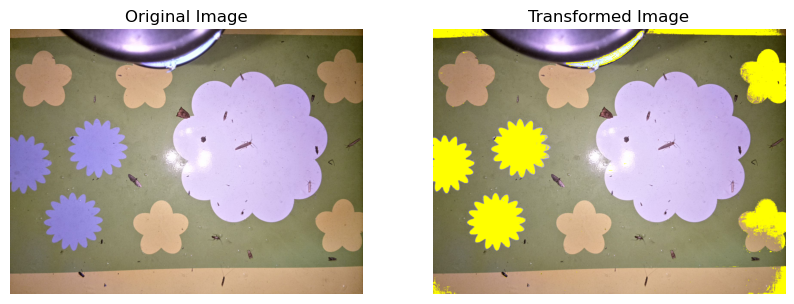

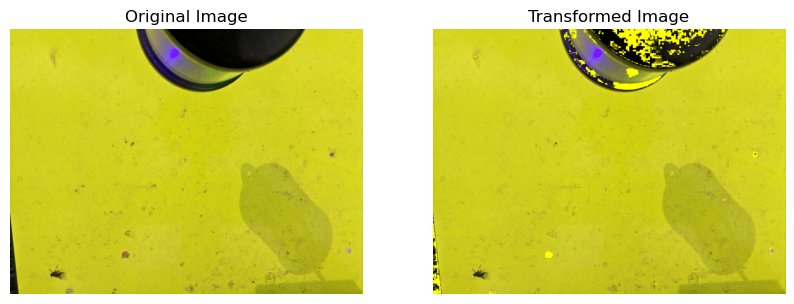

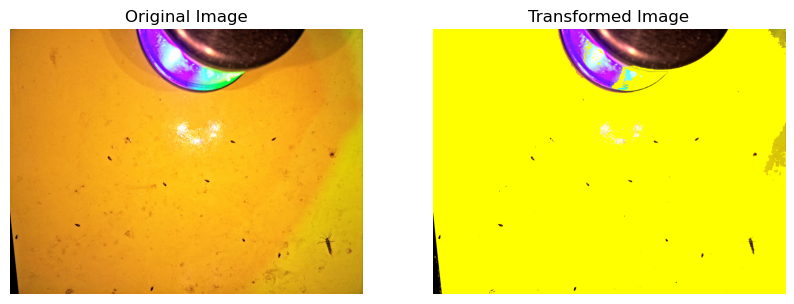

In [24]:
def replace_background(image, mask):
    # Invert mask to target everything except the insects
    mask_inverted = cv2.bitwise_not(mask)
    
    # Create a yellow background
    yellow_background = np.full_like(image, (0, 255, 255), dtype=np.uint8)
    
    # Combine the yellow background with the original image using the inverted mask
    result = cv2.bitwise_and(image, image, mask=mask_inverted)
    result = cv2.add(result, cv2.bitwise_and(yellow_background, yellow_background, mask=mask))
    
    return result

def plot_images(original, transformed):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Transformed Image')
    plt.imshow(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def process_images(image_paths):
    for image_path in image_paths:
        # Load the image and convert to HSV
        original_image, image_hsv = load_and_convert_image(image_path)
        
        # Create a mask for everything except the insects
        mask = create_mask(image_hsv)
        
        # Replace the background with yellow
        yellow_background_image = replace_background(original_image, mask)
        
        # Display the images
        plot_images(original_image, yellow_background_image)

# List of image paths
image_paths = [
    'data/flower-day.jpg',
    'data/flower-night.jpg',
    'data/yellow-day.jpg',
    'data/yellow-night.jpg'
]

# Process all images
process_images(image_paths)

## Step 5: Display Results

Finally, we will plot the original and the transformed images side by side for visual comparison.

In [25]:
def plot_images(original, transformed):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Transformed Image')
    plt.imshow(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    
    plt.show()

## Step 6: Process Sample Images

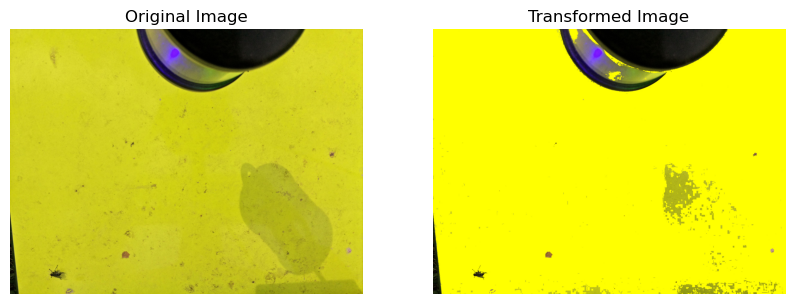

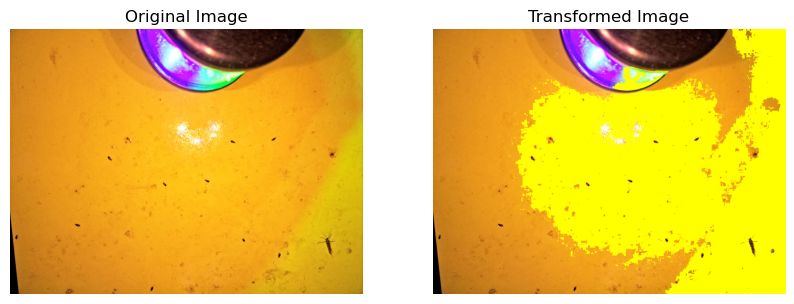

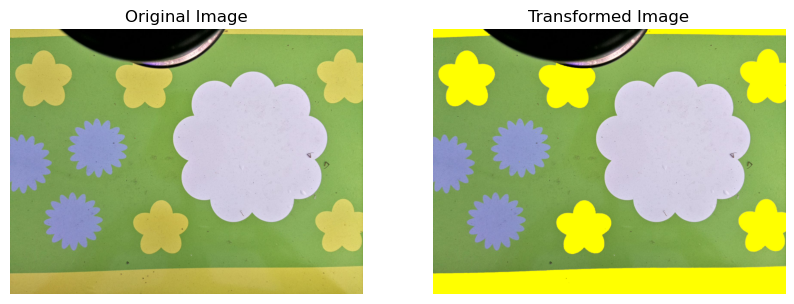

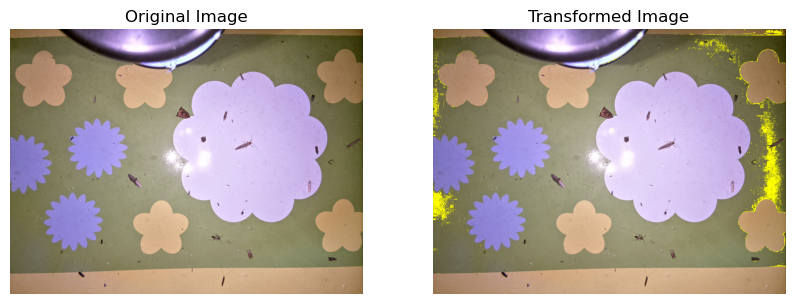

Better Results


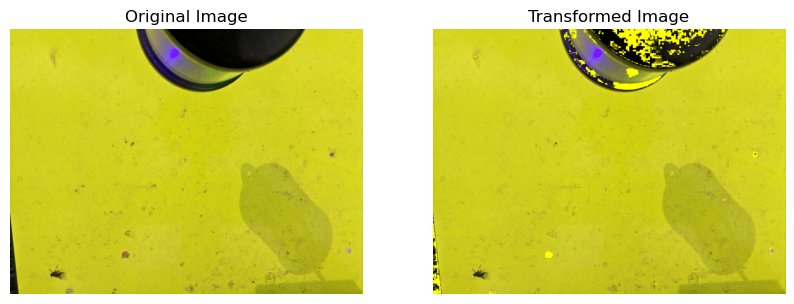

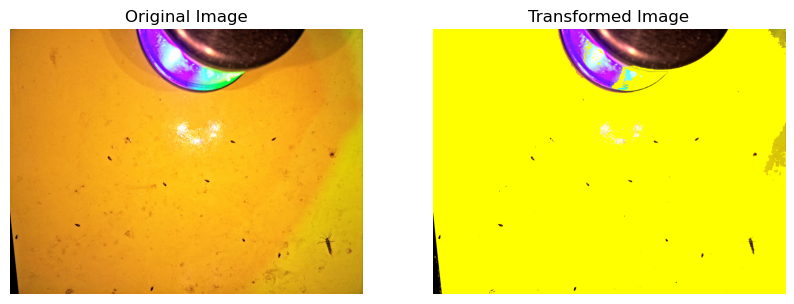

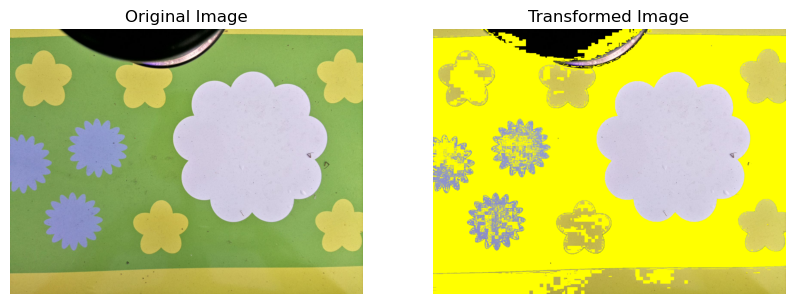

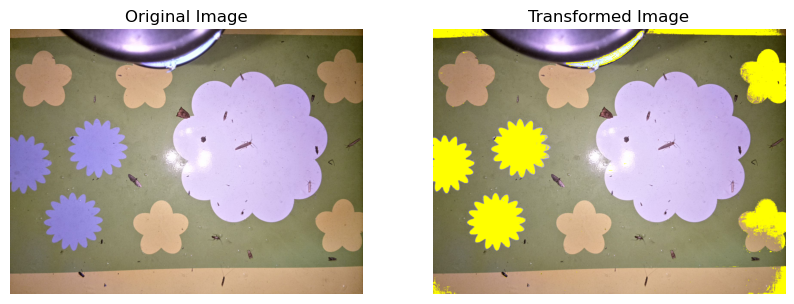

In [26]:
image_paths = ['data/yellow-day.jpg', 'data/yellow-night.jpg', 'data/flower-day.jpg', 'data/flower-night.jpg']

for image_path in image_paths:
    original, image_hsv = load_and_convert_image(image_path)
    mask = create_flower_mask(image_hsv, lower_yellow, upper_yellow, lower_blue, upper_blue)
    transformed = replace_background(original, mask)
    plot_images(original, transformed)

# Process all images
print("Better Results")
process_images(image_paths)    